# Pride, Prejudice and Vampires

If you squint your eyes and look sideways, this exercise is a little like the
classic [Pride and Prejudice and
Zombies](https://en.wikipedia.org/wiki/Pride_and_Prejudice_and_Zombies).  OK,
it's not as classic as the original book, but still, a classic in its own way.

For this exercise, you are going to adapt the original [Literary
Characters][litchar] notebook so that, instead of analyzing the text of "Pride and
Prejudice", it analyzes the text of
[Dracula](https://en.wikipedia.org/wiki/Dracula) by Bram Stoker.

[litchar]: https://matthew-brett.github.io/cfd2020/intro/Literary_Characters.html

You can find the full text of Bram Stoker's Dracula at
<http://www.gutenberg.org/ebooks/345.txt.utf-8>.

## Don't worry about the details

The exercise asks you to edit the code in the original notebook, but, like the
original notebook, we do not expect you to fully understand this code.  You
will learn many aspects of how this code works over the rest of the course.

## The task

Below, you will see the code cells from the original Literary Characters
notebook.  Your task is to edit these code cells so the notebook analyzes
"Dracula" instead of "Pride and Prejudice".

## The initial warmup stuff - just run this cell

The cell below loads in some libraries we will use.  Don't worry about the
details of this cell, just type shift with Enter to **run** the cell.

Make sure you have run the cell.  When you have run the cell, you should see a
number in the `In [ ]` text at the left hand side of the cell.  For example,
you might see `In [1]`, meaning that this is the first cell you have run.

In [1]:
# Just run this cell.
# The standard set of libraries we need.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make plots look a little bit more fancy.
plt.style.use('fivethirtyeight')

# The standard library for data in tables.
import pandas as pd

# A tiny function to read a file directly from a URL
from urllib.request import urlopen

def read_url(url):
    return urlopen(url).read().decode()

## Change the URL to point to Bram Stoker's Dracula

In the cell below, replace this text:

```
book_url = 'http://www.gutenberg.org/ebooks/42671.txt.utf-8'
```

with:

```
book_url = 'http://www.gutenberg.org/ebooks/345.txt.utf-8'
```

Type shift with Enter to run the cell below.  This will read the text of
"Dracula" into the computer memory, instead of the text of "Pride and
Prejudice".

In [2]:
# Read the book text.
book_url = 'http://www.gutenberg.org/ebooks/42671.txt.utf-8'
book_text = read_url(book_url)
# Show the first 500 characters
print(book_text[:500])

﻿The Project Gutenberg eBook, Pride and Prejudice, by Jane Austen, Edited
by R. W. (Robert William) Chapman


This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org





Title: Pride and Prejudice


Author: Jane Austen

Editor: R. W. (Robert William) Chapman

Release Date: May 9, 2013 


Look at the text that Python prints.  Make sure it's the first 500 characters
of "Dracula" and not "Pride and Prejudice".  If you the text is from "Dracula",
the first line printed above should be "The Project Gutenberg EBook of Dracula,
by Bram Stoker".

If the text printed is still from "Pride and Prejudice", go back and check you
have changed the URL, as above, and that you have run the cell reading in the
text.

## Split the book text into chapters

Run this code cell (Shift-Enter) to split the text into chapters:

In [3]:
# Just run this cell.
# Break the text into Chapters
book_chapters = book_text.split('CHAPTER ')
# Drop the first "Chapter" - it's the Project Gutenberg header
book_chapters = book_chapters[1:]

## Count how many times each character name occurs

Oops, sorry for the accidental pun about "count".

The next task is to change the character names from those in "Pride and
Prejudice", to those in "Dracula".

We are going to look for these character names:

* Count (for Count Dracula),
* Harker (for Jonathan Harker, the hero),
* Mina (for Mina Murray, Harker's fiancé),
* Seward (for John Seward, Harker's friend),
* Helsing (for Abraham Van Helsing, Seward's teacher, and all-round expert),
* Quincey (for Quincey Morris, an American cowboy and explorer).

I know, only the female and the American characters have first names, I can
only apologize on behalf of Mr Stoker.  And Jane Austen, actually.  But hey.

In the cell below, replace `'Elizabeth'` with `'Count'`, so the first few lines
of the cell go from this (the original "Pride and Prejudice" version):

```
# Count how many times the characters appear in each chapter.
counts = pd.DataFrame.from_dict({
        'Elizabeth': np.char.count(alice_chapters, 'Elizabeth'),
```

to this (the "Dracula" version):

```
# Count how many times the characters appear in each chapter.
counts = pd.DataFrame.from_dict({
        'Count': np.char.count(alice_chapters, 'Count'),
```

Notice I replaced `'Elizabeth'` twice, once at the beginning and once at the
end of the line.

Now continue replacing:

* `'Darcy'` with `'Harker'`
* `'Lydia'` with `'Mina'`
* `'Wickham'` with `'Seward'`
* `'Bingley'` with `'Helsing'`
* `'Jane'` with `'Quincey'`

Here is the code cell you need to change:

In [4]:
# Count how many times the characters appear in each chapter.
# Change this cell to look for the Dracula names.
counts = pd.DataFrame.from_dict({
        'Elizabeth': np.char.count(book_chapters, 'Elizabeth'),
        'Darcy': np.char.count(book_chapters, 'Darcy'),
        'Lydia': np.char.count(book_chapters, 'Lydia'),
        'Wickham': np.char.count(book_chapters, 'Wickham'),
        'Bingley': np.char.count(book_chapters, 'Bingley'),
        'Jane': np.char.count(book_chapters, 'Jane')},
    )
# Show the first five rows of the table
counts.head()

,Elizabeth,Darcy,Lydia,Wickham,Bingley,Jane
0,0,0,1,0,4,1
1,1,0,2,0,7,0
2,4,7,1,0,16,5
3,3,7,0,0,11,1
4,2,3,0,0,2,3


Try running the cell above with shift-Enter.

If you get an error, look very carefully at the code - like all programming
languages, Python is very fussy about little things like commas and brackets.
Check [the original][litchar] to see if you can see the difference between your
current code and the original code cell.  Get someone else to have a look, if
you get stuck, you will be surprised how much difference it makes.

## Show the graph

Now you have the character counts, you can just run the code below, to show the
graphs of the cumulative counts.

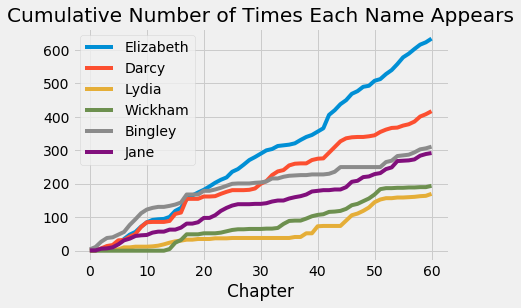

In [5]:
# Just run this cell.
# The cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.
cum_counts = counts.cumsum()

# Add the chapter numbers
number_of_chapters = len(book_chapters)
cum_counts['Chapter'] = np.arange(number_of_chapters)

# Do the plot
cum_counts.plot(x='Chapter')
plt.title('Cumulative Number of Times Each Name Appears');

In the plot above, the horizontal axis shows chapter numbers and the vertical
axis shows how many times each character has been mentioned up to and
including that chapter.

## Questions for reflection

In roughly what chapter does the Count (Dracula) start to have a big role? How
about Van Helsing?

Is there something funny about the chapters? You may notice that all the
characters seem to start rather late in the chapter sequence.  Investigate to
see why this is.  If you are feeling adventurous, you may want to look at the
chapter lengths, using the code in [Another Kind of Character][anotherchar],
and by looking at the original text at
<http://www.gutenberg.org/ebooks/345.txt.utf-8>.  If you can, put an
explanation with some code at the end of the notebook to say what you think is
going on.

[anotherchar]: https://matthew-brett.github.io/cfd2020/intro/Another_Kind_Of_Character.html

In [ ]:
# Maybe you want to put some code here.